In [1]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import numpy as np
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [2]:
MC_N = 100
MC_store = np.zeros((MC_N,3))
for j in range(MC_N):
    print(j)
    N = 1000
    K = 10
    σ_t = 1
    σ_y = 1
    σ_x = 1
    θ = 0.5 # TRUE ATE
    α_t = np.random.normal(1,0.1,K)
    α_y = np.random.normal(1,0.1,K)
    x = np.random.normal(0,σ_x,(N,K))
    e_t = np.random.normal(0,σ_t,N)
    e_y = np.random.normal(0,σ_y,N)
    t = np.exp(np.dot(α_t,x.T)/100) + e_t
    y = np.exp(np.dot(α_y,x.T)/100) + θ * t + e_y
    y = y.reshape(-1, 1)
    t = t.reshape(-1, 1)

    # OLS
    mod = sm.OLS(y, np.c_[t,x])
    res = mod.fit()
    θ_OLS = res.params[0]

    # DML Lasso
    est = LinearDML(random_state=1)
    est.fit(y, t, X=None,W=x)
    θ_DMLL = est.intercept_
    
    # DML RF
    est = LinearDML(discrete_treatment=False, model_y = MLPRegressor(), model_t = MLPRegressor())
    est.fit(y.ravel(), t.ravel(), X=None,W=x)
    θ_DMLRF = est.intercept_
    
    MC_store[j] = [θ_OLS, θ_DMLL, θ_DMLRF]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


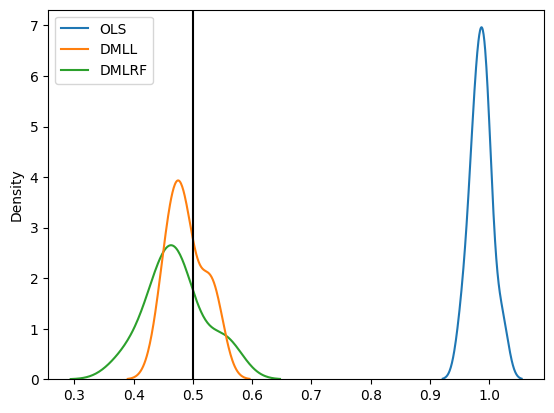

In [3]:
df = pd.DataFrame(MC_store[0:11, :],columns=['OLS','DMLL','DMLRF'])
sns.kdeplot(df)
plt.axvline(0.5, color='black')